# Lab 6: Covariance and longer and wider tables

In [6]:
library(tidyverse)
#devtools::install_github("tidyverse/tidyr", force = TRUE)
#library(tidyr)
#install.packages("dslabs")
library(dslabs)

## 1 Covariance and Correlation

$$Cov(X,Y) = E(XY) - E(X)E(Y)$$
<br>
$$Correlation(X,Y) = \rho_{X,Y} = \frac{Cov(X,Y)}{sd(X)sd(Y)}$$

Couple of rules:
* $Cov(X, X) = var(X)$
* $Cov(X, aY+c) = aCov(X,Y)$ where $X$ and $Y$ are random variables, $a$ and $c$ are constants
* If $X$ and $Y$ are independent than $Cov(X,Y) = 0$
* $Var(aX+c) = a^2 Var(X)$

Example: Let $X$ and $Z$ be independent random variables and let $Y = 2X+Z+5$. What is $\rho_{X, Y}$. (Suppose both $X$ and $Z$ are coming from $N(0,1)$)

#### Theoratical solution:
$$Cov(X, Y) = Cov(X, 2X+Z+5) = Cov(X, 2X)+Cov(X,Z)+Cov(X,5) = Cov(X,2X) = 2Var(X) = 2$$
<br>
$$Var(Y) = Var(2X+Z+5) = 4Var(X) + Var(Z) = 5$$
<br>
$$\rho_{X, Y} = \frac{Cov(X, Y)}{sd(X)sd(Y)} = \frac{2Var(X)}{sd(X)sd(Y)} = \frac{2}{\sqrt{5}} = 0.89 $$

#### Empirical solution:

In [8]:
set.seed(108)

n = 100000
X = rnorm(n)
Z = rnorm(n)
Y = 2*X + Z + 5

cor(X,Y)

[1] 0.8946458

#### In real data we only have empirical solution because most of the time we do not know the underlying distribution

In [10]:
gapminder %>% filter(year == 2011) %>% group_by(continent) %>% 
summarise(rho = cor(infant_mortality, life_expectancy, use = "complete.obs"))

,continent,rho
,<fct>,<dbl>
1,Africa,-0.6300899
2,Americas,-0.7876818
3,Asia,-0.8319735
4,Europe,-0.6746311
5,Oceania,-0.8656749


#### Exercise 1: Why there are `NA`'s for some continents? How can you correct that?

continent,rho
Africa,-0.6300899
Americas,-0.7876818
Asia,-0.8319735
Europe,-0.6746311
Oceania,-0.8656749


## 1 Longer and Wider tables

In [11]:
grades_wide = tribble(
  ~name, ~Sex, ~`2015`, ~`2016`, ~`2017`,
     'Wu',  'M', 83,      89,      93,
  'Alice',  'F', 92,      90,      93,
 'Jordan',   NA, 80,      87,      99,
 'Gilberto','M', 67,      90,      92)
grades_wide

name,Sex,2015,2016,2017
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Wu,M,83,89,93
Alice,F,92,90,93
Jordan,NA,80,87,99
Gilberto,M,67,90,92


In [12]:
grades_long = grades_wide %>% 
pivot_longer(-c(name, Sex), names_to = "year", values_to = "grades")
#pivot_longer(`2015`:`2017`, names_to = "year", values_to = "grades")
grades_long

name,Sex,year,grades
<chr>,<chr>,<chr>,<dbl>
Wu,M,2015,83
Wu,M,2016,89
Wu,M,2017,93
Alice,F,2015,92
Alice,F,2016,90
Alice,F,2017,93
Jordan,NA,2015,80
Jordan,NA,2016,87
Jordan,NA,2017,99


In [13]:
grades_long %>%  pivot_wider(names_from = year, values_from = grades)

name,Sex,2015,2016,2017
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Wu,M,83,89,93
Alice,F,92,90,93
Jordan,NA,80,87,99
Gilberto,M,67,90,92


## MLB dataset

In [14]:
mlb = read_csv('https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab5/mlb.csv')
mlb %>% glimpse


── Column specification ────────────────────────────────────────────────────────
cols(
  year = col_double(),
  name = col_character(),
  team = col_character(),
  division = col_character(),
  PA = col_double(),
  HR = col_double(),
  BBrate = col_character(),
  BB_K = col_character(),
  AVG = col_double(),
  FB = col_double(),
  playerid = col_double()
)




Rows: 1,526
Columns: 11
$ year     <dbl> 2016, 2017, 2015, 2016, 2018, 2018, 2017, 2018, 2015, 2017, 2…
$ name     <chr> "Abraham Almonte", "Abraham Almonte", "Adam Moore", "Adam Moo…
$ team     <chr> "Indians", "Indians", "Indians", "Indians", "Indians", "India…
$ division <chr> "Central", "Central", "Central", "Central", "Central", "Centr…
$ PA       <dbl> 194, 195, 4, 5, 2, 21, 1, 1, 1, 318, 332, 114, 21, 192, 221, …
$ HR       <dbl> 1, 3, 0, 0, 0, 1, 0, 0, 0, 7, 8, 2, 1, 2, 7, 3, 0, 0, 0, 19, …
$ BBrate   <chr> "4.1 %", "10.3 %", "0.0 %", "0.0 %", "0.0 %", "4.8 %", "0.0 %…
$ BB_K     <chr> "8/42", "20/46", "0/2", "0/4", "0/0", "1/5", "0/1", "0/1", "0…
$ AVG      <dbl> 0.264, 0.233, 0.250, 0.000, 0.000, 0.211, 0.000, 0.000, 0.000…
$ FB       <dbl> 43, 34, 1, 1, 0, 7, 0, 0, 0, 68, 61, 16, 6, 44, 58, 10, 0, 0,…
$ playerid <dbl> 5486, 5486, 9362, 9362, 15846, 9682, 6785, 6785, 7411, 9848, …


#### Exercise 2: Calculate the `Home Run to Fly Ball rate (HR/FB)` in total for each team and year. That is $HR\_FB = \frac{\sum HR_i}{\sum FB_i}$. Make sure you have the division at the final dataset. So  you'll have `division`, `team`, `year` and `HR_FB`.

division,team,year,HR_FB
Central,Indians,2015,0.09964727
Central,Indians,2016,0.11984021
Central,Indians,2017,0.13141026
Central,Indians,2018,0.12936849
Central,Royals,2015,0.08997253
Central,Royals,2016,0.10412148


 #### Exercise 3: Convert this to a wide dataset, so your variables should be `division`, `team`, and `2015-2018`, where values are the `HR/FB` rate. Note that, again, you should ensure that `division` is still in the dataset.

division,team,2015,2016,2017,2018
Central,Indians,0.09964727,0.1198402,0.1314103,0.12936849
Central,Royals,0.08997253,0.1041215,0.1225681,0.10319635
Central,Tigers,0.09611152,0.1376147,0.1077051,0.09244314
Central,Twins,0.10641201,0.1308677,0.1312420,0.09869494
Central,White_Sox,0.10594947,0.1220799,0.1352785,0.13573620
East,Blue_Jays,0.16168582,0.1460446,0.1417910,0.13721264


 #### Exercise 4: Create a variable called `increased`, which checks if the `HR/FB` rate was higher in 2018 than it was in 2015 for that team.

[1] 19

#### Exercise 5: Calculate the correlation between each year with the following year. That is $\rho_{2015, 2016}, \rho_{2016, 2017}, \rho_{2017, 2018}$

2015-2016,2016-2017,2017-2018
0.6381773,0.2025801,0.3866467


#### Exercise 6: Turn `df_wide` back into a "long" dataset

division,team,increased,year,HR_FB
Central,Indians,TRUE,2015,0.09964727
Central,Indians,TRUE,2016,0.11984021
Central,Indians,TRUE,2017,0.13141026
Central,Indians,TRUE,2018,0.12936849
Central,Royals,TRUE,2015,0.08997253
Central,Royals,TRUE,2016,0.10412148


#### Exercise 7: Create a plot of `HR/FB` rate on `year`. Color it by `team`, facet it by `division`, and choose the linetype according to the `increased` variable.

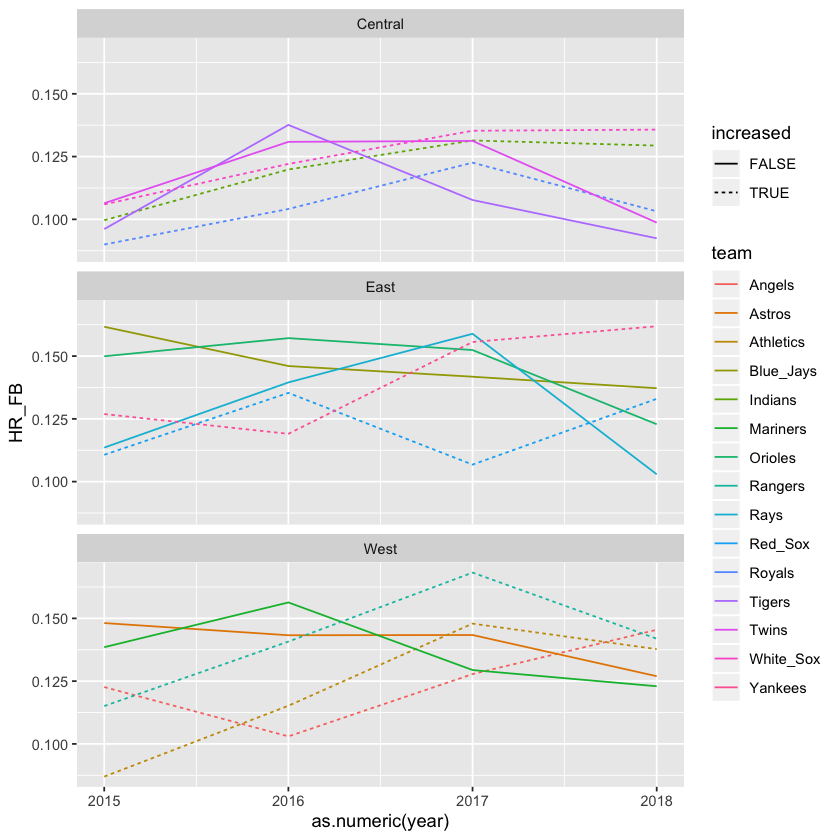